In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegression, LogisticRegressionCV,Ridge
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv("/Users/saikatbasu/Documents/PersonalInformation_Oct2022/IBMDataScience-Coursera/MLwithPython-9of12/Module5-EvaluatingValidatingModels/earthquake_data_tsunami.csv")

In [5]:
y = df["tsunami"]

In [6]:
df.columns

Index(['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth',
       'latitude', 'longitude', 'Year', 'Month', 'tsunami'],
      dtype='object')

In [7]:
X = df[['magnitude', 'cdi', 'mmi', 'sig', 'nst', 'dmin', 'gap', 'depth','latitude', 'longitude', 'Year', 'Month']]

In [11]:
scaler = StandardScaler()

In [12]:
X_Scaled = scaler.fit_transform(X)

In [89]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size=0.2,random_state=42)

In [91]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth=4)
knn = KNeighborsClassifier(n_neighbors=5)
svc = SVC(kernel='linear',C=1)

In [92]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [93]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [94]:
svc.fit(X_train,y_train)

SVC(C=1, kernel='linear')

In [95]:
yhat_dtree = dtree.predict(X_test)
yhat_knn = knn.predict(X_test)
yhat_svc = svc.predict(X_test)

In [96]:
accuracy_score(y_test,yhat_dtree)

0.9426751592356688

In [97]:
accuracy_score(yhat_knn,y_test)

0.8598726114649682

In [98]:
accuracy_score(y_test,yhat_svc)

0.8726114649681529

In [99]:
confusion_matrix_dtree = confusion_matrix(y_test,yhat_dtree)
confusion_matrix_knn = confusion_matrix(y_test,yhat_knn)
confusion_matrix_svc = confusion_matrix(y_test,yhat_svc)

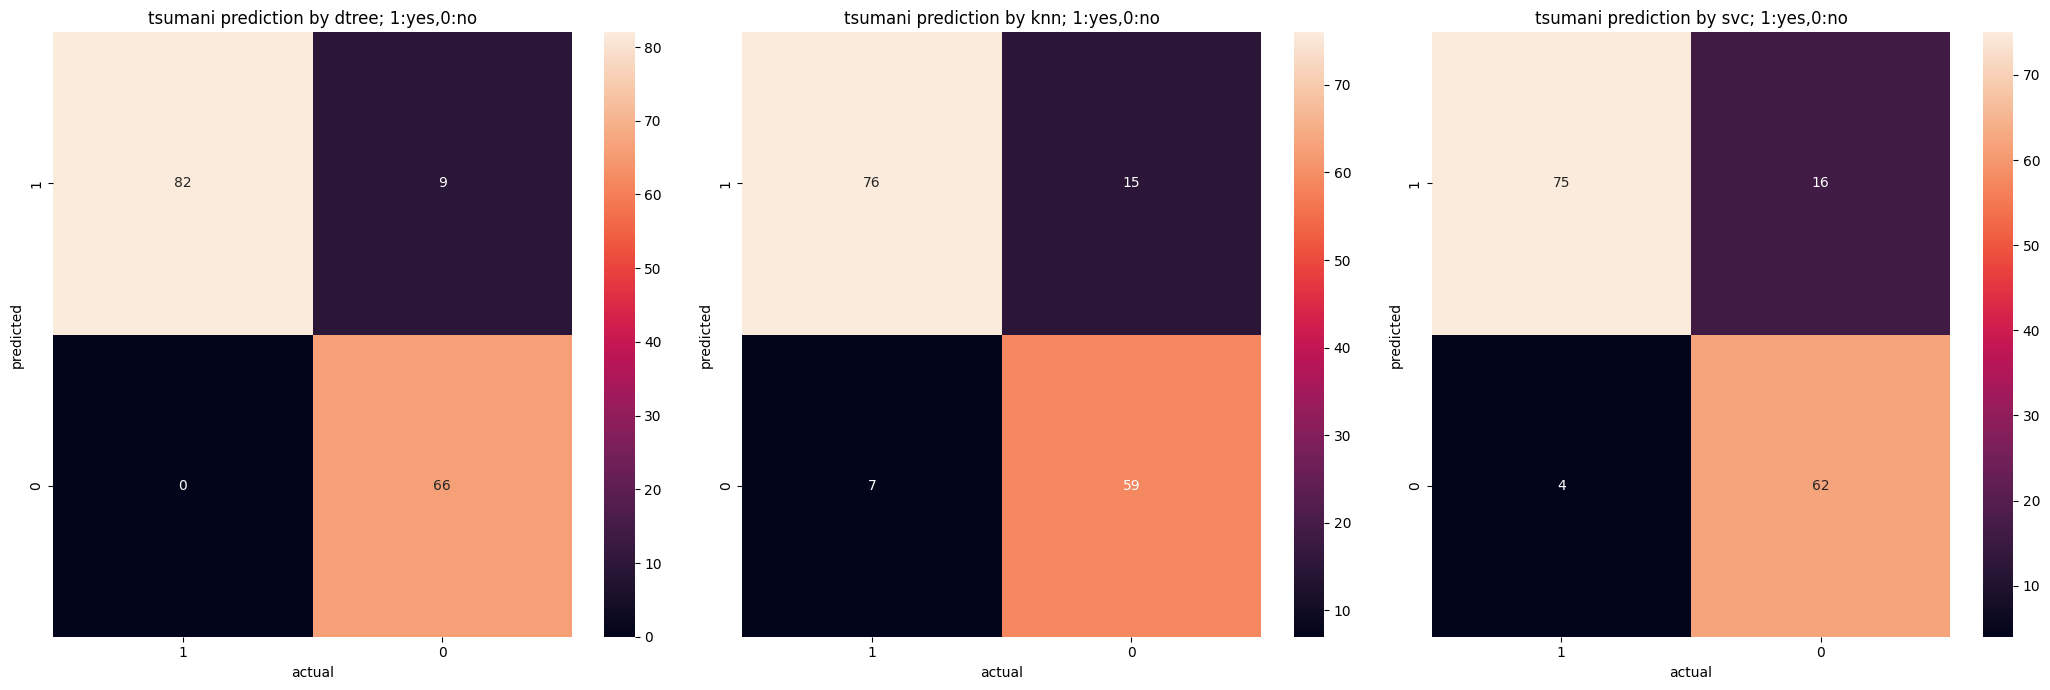

In [100]:
labels = [1,0]
fig,axes = plt.subplots(1,3,figsize=(21,7))
sns.heatmap(confusion_matrix_dtree,xticklabels=labels,yticklabels=labels,annot=True,fmt='d',ax=axes[0])
axes[0].set_title("tsumani prediction by dtree; 1:yes,0:no")
axes[0].set_xlabel("actual")
axes[0].set_ylabel("predicted")

sns.heatmap(confusion_matrix_knn,xticklabels=labels,yticklabels=labels,annot=True,fmt='d',ax=axes[1])
axes[1].set_title("tsumani prediction by knn; 1:yes,0:no")
axes[1].set_xlabel("actual")
axes[1].set_ylabel("predicted")

sns.heatmap(confusion_matrix_svc,xticklabels=labels,yticklabels=labels,annot=True,fmt='d',ax=axes[2])
axes[2].set_title("tsumani prediction by svc; 1:yes,0:no")
axes[2].set_xlabel("actual")
axes[2].set_ylabel("predicted")

plt.tight_layout()

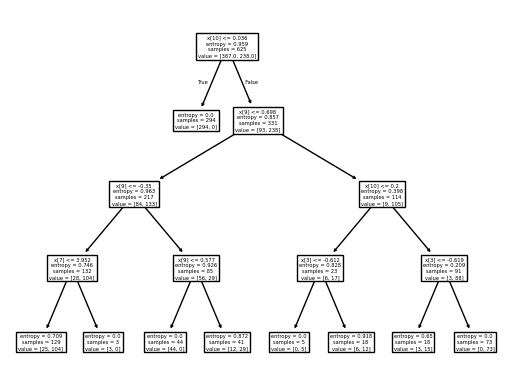

In [81]:
plot_tree(dtree)
plt.show()